In [43]:
#
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (16, 9)

In [2]:
#
mon = pd.read_csv('../data/monday.csv', sep = ";", index_col = 'timestamp')
tue = pd.read_csv('../data/tuesday.csv', sep = ";", index_col = 'timestamp')
wed = pd.read_csv('../data/wednesday.csv', sep = ";", index_col = 'timestamp')
thu = pd.read_csv('../data/thursday.csv', sep = ";", index_col = 'timestamp')
fri = pd.read_csv('../data/friday.csv', sep = ";", index_col = 'timestamp')

In [17]:
#
supermarket_table = pd.concat([mon, tue, wed, thu, fri])
supermarket_table

,customer_no,location
timestamp,,
2019-09-02 07:03:00,1,dairy
2019-09-02 07:03:00,2,dairy
2019-09-02 07:04:00,3,dairy
2019-09-02 07:04:00,4,dairy
2019-09-02 07:04:00,5,spices
...,...,...
2019-09-06 21:50:00,1500,dairy
2019-09-06 21:50:00,1507,checkout
2019-09-06 21:50:00,1508,checkout


In [20]:
#
next_shelf = supermarket_table.groupby('customer_no')['location'].shift(-1)
next_shelf

timestamp
2019-09-02 07:03:00    checkout
2019-09-02 07:03:00    checkout
2019-09-02 07:04:00    checkout
2019-09-02 07:04:00    checkout
2019-09-02 07:04:00    checkout
                         ...   
2019-09-06 21:50:00         NaN
2019-09-06 21:50:00         NaN
2019-09-06 21:50:00         NaN
2019-09-06 21:50:00         NaN
2019-09-06 21:50:00         NaN
Name: location, Length: 24877, dtype: object

In [21]:
#
supermarket_table['Next_Shelf'] = next_shelf
supermarket_table

,customer_no,location,Next_Shelf
timestamp,,,
2019-09-02 07:03:00,1,dairy,checkout
2019-09-02 07:03:00,2,dairy,checkout
2019-09-02 07:04:00,3,dairy,checkout
2019-09-02 07:04:00,4,dairy,checkout
2019-09-02 07:04:00,5,spices,checkout
...,...,...,...
2019-09-06 21:50:00,1500,dairy,NaN
2019-09-06 21:50:00,1507,checkout,NaN
2019-09-06 21:50:00,1508,checkout,NaN


In [26]:
#
pd.crosstab(supermarket_table['location'], supermarket_table['Next_Shelf'])

Next_Shelf,checkout,dairy,drinks,fruit,spices
location,,,,,
checkout,0,1704,883,2258,1048
dairy,1825,0,1044,887,917
drinks,2096,106,0,855,846
fruit,2555,1221,697,2,646
spices,941,1214,1026,571,0


In [39]:
#
trans_prob_mt = pd.crosstab(supermarket_table['location'], supermarket_table['Next_Shelf'],
                                normalize = 0)
trans_prob_mt

Next_Shelf,checkout,dairy,drinks,fruit,spices
location,,,,,
checkout,0.000000,0.289157,0.149839,0.383166,0.177838
dairy,0.390541,0.000000,0.223411,0.189814,0.196234
drinks,0.537023,0.027159,0.000000,0.219062,0.216756
fruit,0.498926,0.238430,0.136106,0.000391,0.126147
spices,0.250800,0.323561,0.273454,0.152186,0.000000


In [41]:
#
trans_prob_mt.sum(axis = 1)

location
checkout    1.0
dairy       1.0
drinks      1.0
fruit       1.0
spices      1.0
dtype: float64

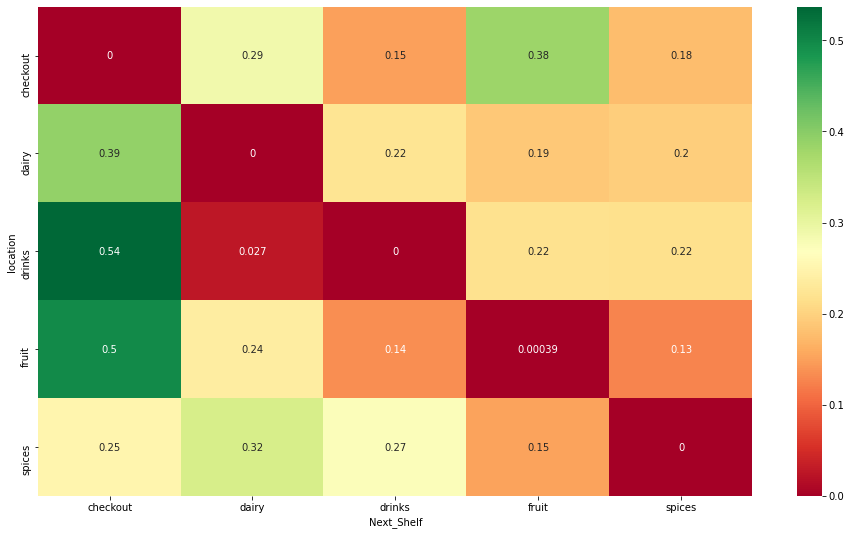

In [55]:
#
sns.heatmap(trans_prob_mt, cmap ='RdYlGn', annot = True)
plt.show()